# Principle Component Regression (PCR)

*Erik van Schaik*

This notebook shows how to do principle component regression (PCR) using Python. As of today, no predefined function to do PCR is available. 

PCR differs from ordinary linear squares (OLS) regression by assuming errors in both variables. Rather than minimizing the distance from y to x (or vice versa), it minimizes the distance from x **and** y to a common predictor. PCR is the preferred statistical model to use when constructing Keeling plots. See also https://en.wikipedia.org/wiki/Principal_component_regression and Miller et al. (2003)

If all goes well, the PCR fit should look more like the expected 'best fit' through the cloud of points. It also have a lower RMSE when noise is large enough.

***NOTE: If PCA fit is reversed, run again. This is expected behaviour as PC's are not bound by absolute direction***

Miller, John B., and Pieter P. Tans. “Calculating Isotopic Fractionation from Atmospheric Measurements at Various Scales.” Tellus B 55, no. 2 (April 2003): 207–14. doi:10.1034/j.1600-0889.2003.00020.x.


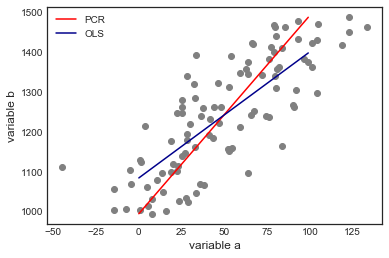

r:           0.796835559743
MSE of LM:   2816.16251754
MSE of PCA:  323.707440286


In [34]:
# Load libraries
import numpy as np
from scipy.stats import linregress
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')

%matplotlib inline


# Create two variables with noise
a = np.random.randn(100)*20. + np.arange(0,100,1) 
b = np.random.randn(100)*20. + np.arange(0,500,5) + 1000.

# Put them in an array
c = np.zeros((100,2))
c[:,0] = a
c[:,1] = b



#########
# TRAIN #
#########

# Train PCA
pca = PCA(n_components=1)
pca.fit_transform(c)

# Train linear model
fit = linregress(a,b)

# Derive coefficients from PCA
pca_slope = 1./pca.components_[0][0]
pca_intercept = np.mean(b) - (np.mean(a) * pca_slope)



########
# PLOT #
########

# Create lines for fits
pca_fit = np.arange(0,100,1) * pca_slope + pca_intercept
lm_fit = np.arange(0,100,1) * fit[0] + fit[1]

# Plot
fig,ax = plt.subplots()
ax.scatter(a,b, color='grey')
ax.plot(pca_fit, label='PCR', color='red')
ax.plot(lm_fit, label='OLS', color='darkblue')
ax.set_xlabel('variable a', fontsize=12)
ax.set_ylabel('variable b', fontsize=12)
ax.legend()
plt.show()

# Print statistics
print("r:          ",np.corrcoef(a,b)[0][1])
print("MSE of LM:  ",mse(b,lm_fit))
print("MSE of PCA: ",mse(b,pca_fit))